<a href="https://colab.research.google.com/github/alviyandriadillah/Machine-Learning/blob/main/Chapter_3_2_Linear_Regression_Implementation_from_Scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install mxnet

In [2]:
pip install d2l

In [3]:
%matplotlib inline
import random
from mxnet import autograd, np, npx
from d2l import mxnet as d2l

npx.set_np()

**3.2.1. Generating the Dataset**

In [4]:
def synthetic_data(w, b, num_examples):  #@save
    """Generate y = Xw + b + noise."""
    X = np.random.normal(0, 1, (num_examples, len(w)))
    y = np.dot(X, w) + b
    y += np.random.normal(0, 0.01, y.shape)
    return X, y.reshape((-1, 1))

true_w = np.array([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)

In [5]:
print('features:', features[0],'\nlabel:', labels[0])

features: [2.2122064 1.1630787] 
label: [4.662078]


In [6]:
pip uninstall matplotlib

Found existing installation: matplotlib 3.3.3
Uninstalling matplotlib-3.3.3:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/matplotlib-3.3.3-py3.7-nspkg.pth
    /usr/local/lib/python3.7/dist-packages/matplotlib-3.3.3.dist-info/*
    /usr/local/lib/python3.7/dist-packages/matplotlib/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axes_grid/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axes_grid1/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axisartist/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/tests/*
    /usr/local/lib/python3.7/dist-packages/pylab.py
Proceed (y/n)? y
  Successfully uninstalled matplotlib-3.3.3


In [7]:
pip install matplotlib

     |████████████████████████████████| 11.2 MB 14.3 MB/s 
     |████████████████████████████████| 890 kB 79.7 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
d2l 0.17.3 requires matplotlib==3.3.3, but you have matplotlib 3.5.1 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


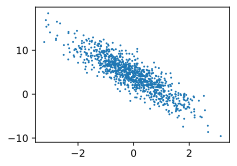

In [8]:
d2l.set_figsize()
# The semicolon is for displaying the plot only
d2l.plt.scatter(features[:, (1)].asnumpy(), labels.asnumpy(), 1);

**3.2.2. Reading the Dataset**

In [9]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    # The examples are read at random, in no particular order
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        batch_indices = np.array(
            indices[i: min(i + batch_size, num_examples)])
        yield features[batch_indices], labels[batch_indices]

In [10]:
batch_size = 10

for X, y in data_iter(batch_size, features, labels):
    print(X, '\n', y)
    break

[[ 0.4054271   0.855615  ]
 [-0.40910295  0.93317765]
 [-1.6079371  -0.4548878 ]
 [ 0.33418044  0.9918955 ]
 [ 1.0206927  -0.57276845]
 [-0.54557085  1.8066407 ]
 [ 0.16111839  1.6079236 ]
 [-0.10548475  2.1780314 ]
 [-0.02392192 -0.38509107]
 [-1.1338538   1.2034788 ]] 
 [[ 2.088863  ]
 [ 0.22510855]
 [ 2.5222678 ]
 [ 1.5007805 ]
 [ 8.170645  ]
 [-3.0409641 ]
 [-0.9584046 ]
 [-3.419401  ]
 [ 5.456544  ]
 [-2.1661222 ]]


**3.2.3. Initializing Model Parameters**

In [11]:
w = np.random.normal(0, 0.01, (2, 1))
b = np.zeros(1)
w.attach_grad()
b.attach_grad()

**3.2.4. Defining the Model**

In [12]:
def linreg(X, w, b):  #@save
    """The linear regression model."""
    return np.dot(X, w) + b

**3.2.5. Defining the Loss Function**

In [13]:
def squared_loss(y_hat, y):  #@save
    """Squared loss."""
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2

**3.2.6. Defining the Optimization Algorithm**

In [14]:
def sgd(params, lr, batch_size):  #@save
    """Minibatch stochastic gradient descent."""
    for param in params:
        param[:] = param - lr * param.grad / batch_size

**3.2.7. Training**

In [15]:
lr = 0.03
num_epochs = 3
net = linreg
loss = squared_loss

for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        with autograd.record():
            l = loss(net(X, w, b), y)  # Minibatch loss in `X` and `y`
        # Because `l` has a shape (`batch_size`, 1) and is not a scalar
        # variable, the elements in `l` are added together to obtain a new
        # variable, on which gradients with respect to [`w`, `b`] are computed
        l.backward()
        sgd([w, b], lr, batch_size)  # Update parameters using their gradient
    train_l = loss(net(features, w, b), labels)
    print(f'epoch {epoch + 1}, loss {float(train_l.mean()):f}')

epoch 1, loss 0.025008
epoch 2, loss 0.000089
epoch 3, loss 0.000051


In [16]:
print(f'error in estimating w: {true_w - w.reshape(true_w.shape)}')
print(f'error in estimating b: {true_b - b}')

error in estimating w: [ 0.00070798 -0.00029659]
error in estimating b: [0.00024843]
